# ライブラリの読み込み 解析に使用するライブラリをインポートします。

In [4]:
# Pandasライブラリを、pdという別名で使用できるように宣言する
import pandas as pd
import matplotlib.pyplot as plt

# Google Driveをマウント

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# データの準備

## 都道府県データの読み込み

In [9]:
df_price_index= pd.read_csv('/content/drive/My Drive/ensyu1/price_index.csv')
df_price_index.head(15)

,都道府県,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費
0,北海道,98.7,82.6,116.3,99.3,103.8,100.2,99.5,93.2,97.1,100.9
1,青森県,97.4,95.7,109.0,96.2,97.1,101.0,100.5,93.2,96.4,97.8
2,岩手県,96.6,89.4,111.0,102.2,97.8,100.4,99.7,90.1,99.8,97.0
3,宮城県,97.2,97.1,101.3,104.0,95.6,100.9,97.5,99.5,99.3,99.2
4,秋田県,97.3,86.1,107.2,103.1,102.4,98.9,98.0,87.1,98.0,100.2
5,山形県,101.7,91.3,111.6,93.5,105.7,97.0,99.7,105.4,99.1,97.6
6,福島県,100.0,92.5,108.6,100.9,106.2,99.9,98.8,90.9,96.6,102.9
7,茨城県,99.1,96.3,101.9,93.0,97.5,98.0,96.7,89.5,95.2,101.4
8,栃木県,99.5,87.9,96.7,100.3,115.7,99.1,97.7,101.9,94.9,99.8
9,群馬県,99.1,87.5,91.2,96.9,98.2,100.0,97.1,79.9,95.5,98.9


## データの基礎統計量を確認

In [10]:
 df_price_index.describe()

,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,99.697872,91.408511,102.251064,99.621277,101.134043,99.861702,99.074468,96.051064,97.629787,99.874468
std,2.230470,10.120724,5.615076,2.927154,5.071286,1.359436,1.771694,7.864031,3.067425,1.900511
min,94.100000,80.200000,91.200000,93.000000,90.100000,97.000000,95.700000,79.900000,91.100000,94.800000
25%,98.550000,85.500000,98.600000,97.800000,97.500000,99.050000,97.750000,90.500000,95.750000,98.850000
50%,99.700000,88.900000,101.900000,100.000000,100.200000,100.000000,98.900000,95.200000,97.200000,99.800000
75%,101.100000,95.450000,106.000000,101.500000,104.850000,100.800000,99.900000,102.050000,99.300000,101.250000
max,103.500000,133.200000,116.300000,108.700000,115.700000,103.100000,104.400000,112.600000,104.800000,103.500000


## データの可視化

### まずは散布図による可視化を行って、データの分布を確認

In [19]:
# 都道府県、食料、水道光熱費の列だけを抽出
df_train = df_price_index[['都道府県', '食料', '水道光熱費']]
df_train.head(15)

,都道府県,食料,水道光熱費
0,北海道,98.7,116.3
1,青森県,97.4,109.0
2,岩手県,96.6,111.0
3,宮城県,97.2,101.3
4,秋田県,97.3,107.2
5,山形県,101.7,111.6
6,福島県,100.0,108.6
7,茨城県,99.1,101.9
8,栃木県,99.5,96.7
9,群馬県,99.1,91.2


Text(0, 0.5, 'Suido_Konetsu')

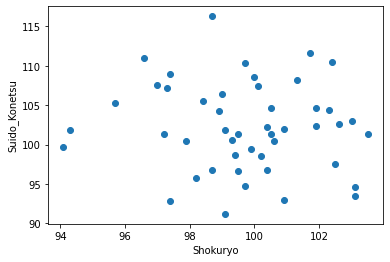

In [23]:
# プロットの準備(x軸:食料、y軸:水道光熱費)
plt.scatter(df_train['食料'], df_train['水道光熱費'])
# X軸、Y軸のラベルを設定
plt.xlabel('Shokuryo')
plt.ylabel('Suido_Konetsu')

# クラスタリング

## 都道府県の列を除外し、食料、水道光熱費だけのデータを作成

In [24]:
# DataFrameをDeep Copy
train_X = df_train.copy(deep=True)
# データから'都道府県'を除外
train_X = train_X.drop('都道府県',axis=1)
train_X.head(15)

,食料,水道光熱費
0,98.7,116.3
1,97.4,109.0
2,96.6,111.0
3,97.2,101.3
4,97.3,107.2
5,101.7,111.6
6,100.0,108.6
7,99.1,101.9
8,99.5,96.7
9,99.1,91.2


## k平均法(k-means)で、47都道府県をクラスタリングするためのモデルを生成
クラスタ数は、とりあえず６にする。

In [25]:
# k平均法(k-means)のライブラリをインポート
from sklearn.cluster import KMeans
# k-meansのモデルを生成
## n_clusters = クラスタ数
## random_state = 乱数のシードを固定(デフォルト値: None)
kmodel = KMeans(n_clusters=6, random_state=0)
kmodel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## クラスタリングを実行

In [26]:
# クラスタリングを実行
kmodel.fit(train_X)
train_Y = kmodel.labels_
print(train_Y)

[2 3 2 5 3 2 3 5 1 4 4 0 4 1 1 0 0 4 4 5 4 1 1 1 5 0 1 1 5 0 0 2 3 0 3 0 3
 3 0 3 3 2 0 3 5 5 0]


## 個数の確認

In [27]:
train_Y.shape

(47,)

## クラスタ番号を、元のDataFrameに連結

In [29]:
# 元のDataFrameをコピーして結果用のDataFrameを作成
df_results = df_train.copy(deep=True)
# クラスタ番号を新しい列として連結
df_results['クラスタ番号'] = train_Y
df_results.head(15)

,都道府県,食料,水道光熱費,クラスタ番号
0,北海道,98.7,116.3,2
1,青森県,97.4,109.0,3
2,岩手県,96.6,111.0,2
3,宮城県,97.2,101.3,5
4,秋田県,97.3,107.2,3
5,山形県,101.7,111.6,2
6,福島県,100.0,108.6,3
7,茨城県,99.1,101.9,5
8,栃木県,99.5,96.7,1
9,群馬県,99.1,91.2,4


## クラスタ番号の順に並び替え

In [30]:
 df_results.sort_values('クラスタ番号')

,都道府県,食料,水道光熱費,クラスタ番号
46,沖縄県,103.5,101.4,0
42,熊本県,101.9,102.3,0
38,高知県,102.6,102.6,0
35,徳島県,100.5,104.6,0
33,広島県,101.9,104.6,0
30,鳥取県,102.3,104.4,0
29,和歌山県,100.9,102.0,0
25,京都府,100.5,101.4,0
11,千葉県,100.6,100.4,0
16,石川県,103.0,103.0,0


## 散布図で可視化

Text(0, 0.5, 'Suido_Konetsu')

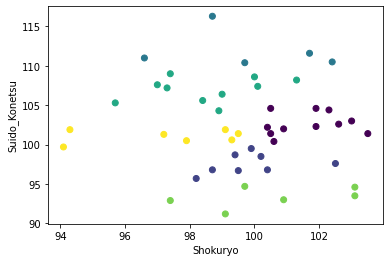

In [31]:
# プロットの準備(x軸:食料、y軸:水道光熱費、色:クラスタ番号 )
plt.scatter(df_results['食料'], df_results['水道光熱費'], c=df_results['クラスタ番号'])
# X軸、Y軸のラベルを設定
plt.xlabel('Shokuryo')
plt.ylabel('Suido_Konetsu')

## カラーコードを設定し、もう一度可視化

Text(0, 0.5, 'Suido_Konetsu')

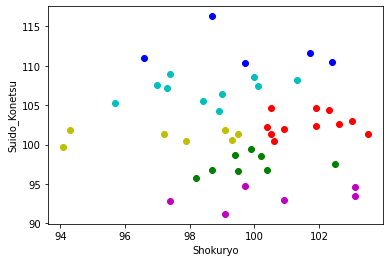

In [32]:
# プロット/グラフ用のカラーリストを準備
LST_COLOR = ['r','g','b','c','m','y','k','lightping','goldenrod']
# プロットの準備(x軸:食料、y軸:水道光熱費、色:カラーリストのクラスタ番号 )
for i in range(len(df_results)):
  plt.scatter(df_results.iloc[i,1],df_results.iloc[i,2],c=LST_COLOR[df_results.iloc[i,3]],label=df_results.iloc[i,3] )
# X軸、Y軸のラベルを設定
plt.xlabel('Shokuryo')
plt.ylabel('Suido_Konetsu')

# エルボー法で、適切なクラスタ数を算出

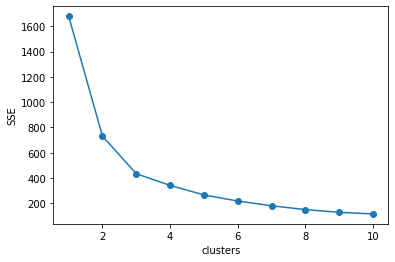

In [33]:
# k平均法(k-means)のライブラリをインポート
from sklearn.cluster import KMeans

lst_history = []

for i in range(1,11): # 1~10クラスタまで一気に計算
  # k-meansのモデルを生成
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(train_X)   # クラスタリングを実行
  lst_history.append(kmeans.inertia_) # inertia_=残差平方和を得る

# 残差二乗和をプロット
plt.plot(range(1,11),lst_history,marker='o')
plt.xlabel('clusters') #クラスタ数
plt.ylabel('SSE')   #残差二乗和
plt.show()

最後に、適切なクラスタ数（３）で再度クラスタリングを行ってみよう。